In [1]:
# Import packages

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
# Call in cleaned airbnb data file

df=pd.read_csv('cleaned_airbnb_data.csv', index_col=0)

In [3]:
df.head()

,name,price_per_night,rating_overall,rating_cleanliness,rating_accuracy,rating_communication,rating_location,rating_check_in,rating_value,num_listing_reviews,...,num_bedrooms,num_beds,num_baths,superhost,borough,property_type,wifi,air_conditioning,heating,kitchen
0,Gramercy park Apartment (2beds),107,4.66,4.6,4.8,4.8,5.0,4.8,4.6,32,...,0,2,1.0,0,manhattan,apartment,1,1,1,1
1,Amazing Views in The Heart of Time Square,305,4.91,4.9,4.8,4.8,4.9,4.6,4.8,117,...,1,1,1.0,0,manhattan,apartment,1,1,1,1
2,FREEMAN'S HOUSE Charming Studio W/ Terrace 1402,159,4.67,4.7,3.3,4.3,3.7,5.0,3.3,3,...,1,1,1.0,0,manhattan,apartment,1,1,1,0
3,West Side Charm - Central Park! Uh,179,4.42,4.2,4.5,4.7,4.9,4.6,4.5,306,...,1,0,1.0,0,manhattan,apartment,1,1,1,1
4,West Village Style and Charm -Thoroughly Sanit...,130,4.97,5.0,5.0,5.0,5.0,4.9,4.9,220,...,1,1,1.5,1,manhattan,private room,1,1,1,1


In [4]:
df.shape

(948, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 947
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    948 non-null    object 
 1   price_per_night         948 non-null    int64  
 2   rating_overall          948 non-null    float64
 3   rating_cleanliness      948 non-null    float64
 4   rating_accuracy         948 non-null    float64
 5   rating_communication    948 non-null    float64
 6   rating_location         948 non-null    float64
 7   rating_check_in         948 non-null    float64
 8   rating_value            948 non-null    float64
 9   num_listing_reviews     948 non-null    int64  
 10  num_host_ratings        948 non-null    int64  
 11  host_response_rate      948 non-null    int64  
 12  host_joined_months_ago  948 non-null    int64  
 13  num_guests              948 non-null    int64  
 14  num_bedrooms            948 non-null    in

In [6]:
df.describe()

,price_per_night,rating_overall,rating_cleanliness,rating_accuracy,rating_communication,rating_location,rating_check_in,rating_value,num_listing_reviews,num_host_ratings,...,host_joined_months_ago,num_guests,num_bedrooms,num_beds,num_baths,superhost,wifi,air_conditioning,heating,kitchen
count,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,...,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000
mean,140.157173,4.759979,4.766772,4.815295,4.867405,4.786076,4.868038,4.741245,95.068565,307.607595,...,54.366034,2.950422,1.080169,1.589662,1.074895,0.467300,0.994726,0.957806,0.981013,0.785865
std,78.546239,0.234972,0.244956,0.217377,0.186341,0.196850,0.175421,0.225505,112.371539,634.882708,...,32.957205,1.398698,0.618192,0.942586,0.249989,0.499193,0.072471,0.201138,0.136552,0.410437
min,38.000000,3.000000,3.200000,3.000000,3.200000,3.000000,3.300000,3.000000,3.000000,3.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,85.000000,4.670000,4.700000,4.800000,4.800000,4.700000,4.800000,4.700000,19.000000,40.000000,...,27.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,120.000000,4.820000,4.800000,4.900000,4.900000,4.800000,4.900000,4.800000,55.000000,132.000000,...,51.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,171.250000,4.920000,4.900000,5.000000,5.000000,4.900000,5.000000,4.900000,130.250000,300.250000,...,79.000000,4.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,649.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,757.000000,5283.000000,...,155.000000,12.000000,4.000000,10.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Scope out regression viability. Explore if any features should be excluded from modeling from the beginning

## Numeric Features

In [7]:
numeric_features = ['price_per_night', 'rating_overall', 'rating_cleanliness', 'rating_accuracy', 'rating_communication', 'rating_location', 'rating_check_in', 'rating_value', 'num_listing_reviews', 'num_host_ratings', 'host_response_rate', 'host_joined_months_ago', 'num_guests', 'num_bedrooms', 'num_beds', 'num_baths']

In [8]:
sub_df = df.loc[:, numeric_features]
sub_df.head()

,price_per_night,rating_overall,rating_cleanliness,rating_accuracy,rating_communication,rating_location,rating_check_in,rating_value,num_listing_reviews,num_host_ratings,host_response_rate,host_joined_months_ago,num_guests,num_bedrooms,num_beds,num_baths
0,107,4.66,4.6,4.8,4.8,5.0,4.8,4.6,32,32,80,18,3,0,2,1.0
1,305,4.91,4.9,4.8,4.8,4.9,4.6,4.8,117,117,70,27,3,1,1,1.0
2,159,4.67,4.7,3.3,4.3,3.7,5.0,3.3,3,307,96,24,2,1,1,1.0
3,179,4.42,4.2,4.5,4.7,4.9,4.6,4.5,306,360,100,106,2,1,0,1.0
4,130,4.97,5.0,5.0,5.0,5.0,4.9,4.9,220,234,100,89,2,1,1,1.5


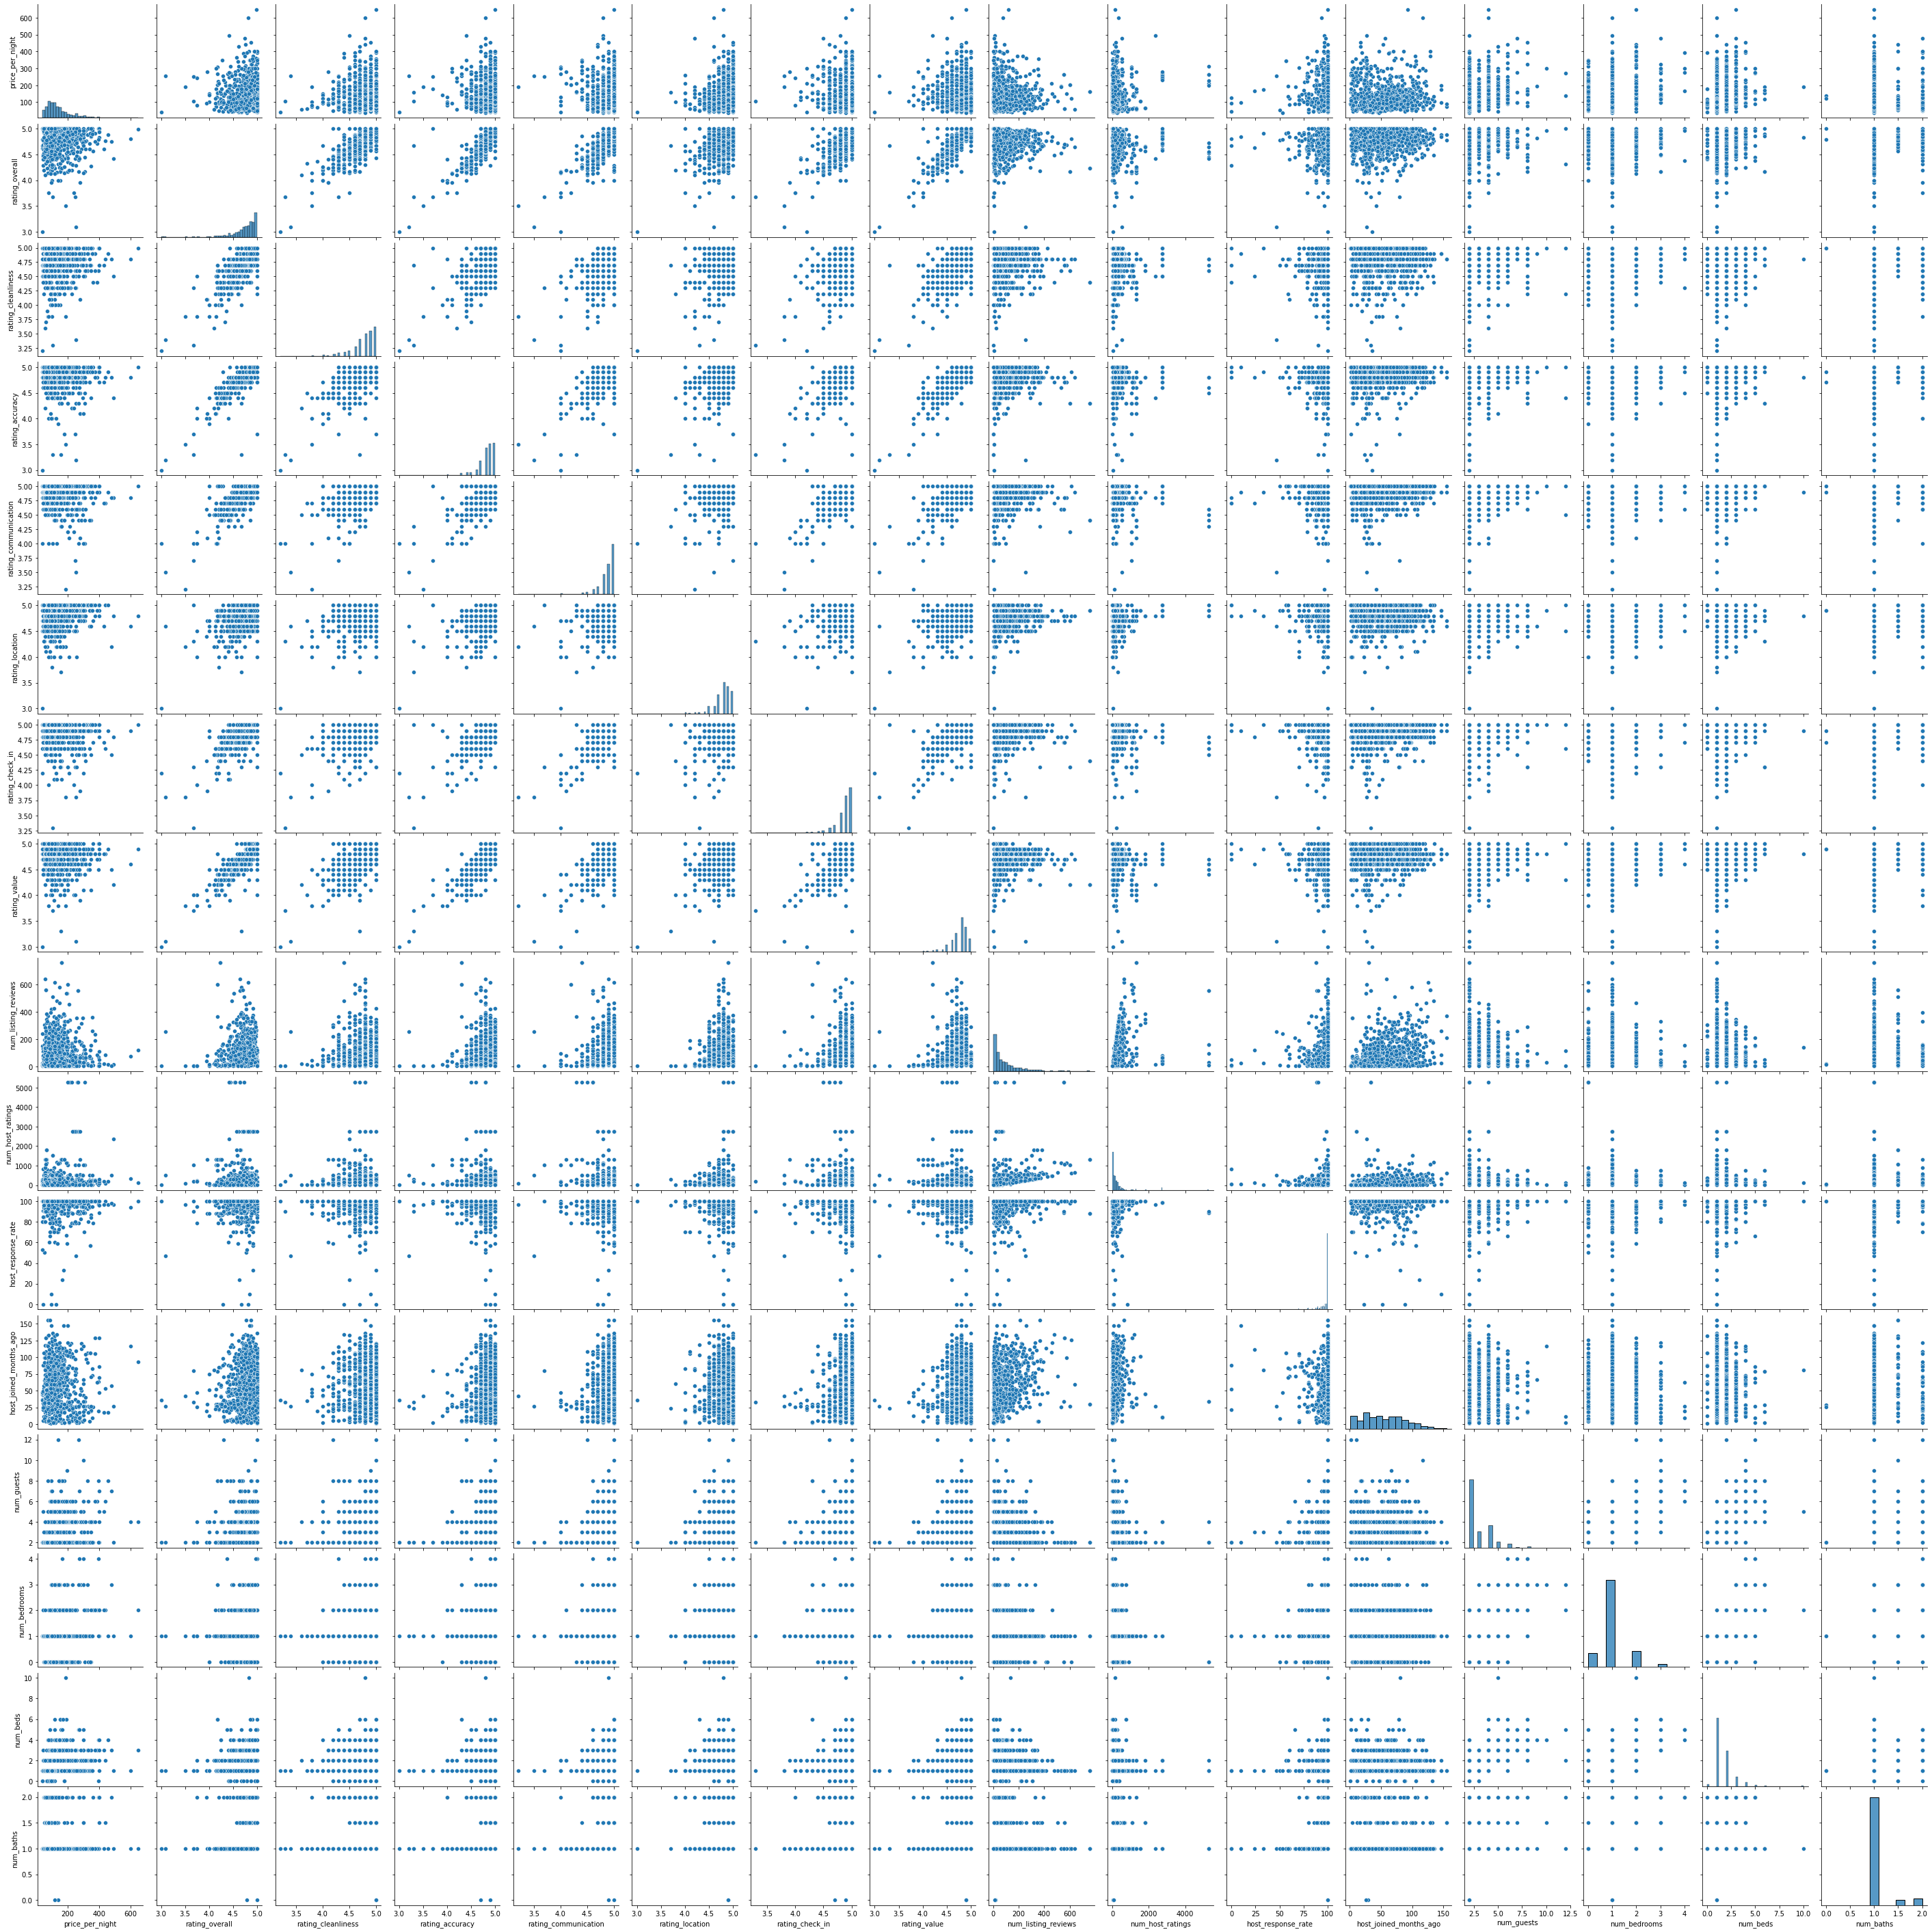

In [9]:
sns.pairplot(sub_df)

In [10]:
sub_df.corr()

,price_per_night,rating_overall,rating_cleanliness,rating_accuracy,rating_communication,rating_location,rating_check_in,rating_value,num_listing_reviews,num_host_ratings,host_response_rate,host_joined_months_ago,num_guests,num_bedrooms,num_beds,num_baths
price_per_night,1.000000,0.019526,0.044644,-0.043452,-0.092430,0.173638,-0.087378,-0.080843,0.010212,0.230795,-0.027327,-0.059606,0.294593,0.199313,0.201292,-0.005548
rating_overall,0.019526,1.000000,0.810631,0.856873,0.778216,0.503637,0.735846,0.844232,-0.126121,-0.156496,0.170126,0.099038,0.036721,0.038250,0.045874,-0.021455
rating_cleanliness,0.044644,0.810631,1.000000,0.709398,0.598091,0.390053,0.572167,0.689321,-0.071758,-0.083752,0.161209,0.015268,0.029706,0.011334,0.041958,-0.077440
rating_accuracy,-0.043452,0.856873,0.709398,1.000000,0.748515,0.487921,0.713721,0.845556,-0.061502,-0.129696,0.112781,0.147867,0.033754,0.008153,0.043548,-0.002642
rating_communication,-0.092430,0.778216,0.598091,0.748515,1.000000,0.398413,0.785392,0.713539,-0.104257,-0.226969,0.174403,0.161132,0.089814,0.051125,0.099322,-0.025746
rating_location,0.173638,0.503637,0.390053,0.487921,0.398413,1.000000,0.399313,0.502508,-0.001752,0.063407,0.005241,0.064998,-0.064640,-0.049824,-0.072939,-0.034578
rating_check_in,-0.087378,0.735846,0.572167,0.713721,0.785392,0.399313,1.000000,0.655595,-0.065666,-0.166072,0.109375,0.133515,0.052496,0.014890,0.069398,-0.006759
rating_value,-0.080843,0.844232,0.689321,0.845556,0.713539,0.502508,0.655595,1.000000,-0.102136,-0.130052,0.127030,0.120812,0.042647,0.066396,0.068777,0.003215
num_listing_reviews,0.010212,-0.126121,-0.071758,-0.061502,-0.104257,-0.001752,-0.065666,-0.102136,1.000000,0.272284,0.023339,0.289619,-0.053397,-0.093565,-0.048664,-0.010840
num_host_ratings,0.230795,-0.156496,-0.083752,-0.129696,-0.226969,0.063407,-0.166072,-0.130052,0.272284,1.000000,-0.022876,-0.105580,-0.115839,-0.144149,-0.106430,-0.019222


Text(0.5, 1.0, "Correlations between dataset's numeric features")

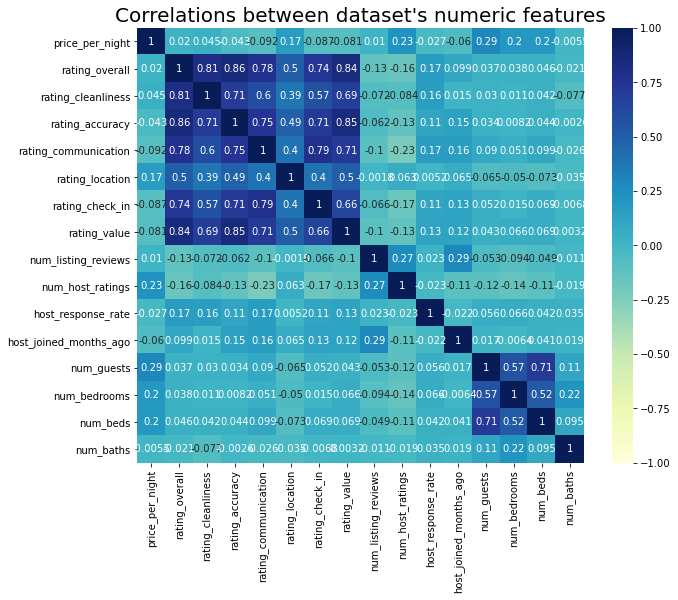

In [11]:
f, ax = plt.subplots(figsize=(10,8))
heatmap_airbnb = sns.heatmap(sub_df.corr(), cmap="YlGnBu", annot=True, vmin=-1, vmax=1)
plt.title("Correlations between dataset's numeric features", fontsize=20)

Observations:
* Correlation among the rating features, which makes sense. Potentially have to drop some.
* Also some correlation among num_guests, num_beds, and num_bedrooms
* Looks like num_guests, num_bedrooms, num_beds have strongest correlations with price. They are all proxies for property size.
* Other strong features are number of host ratings and location rating (categorical "borough" feature should support this)

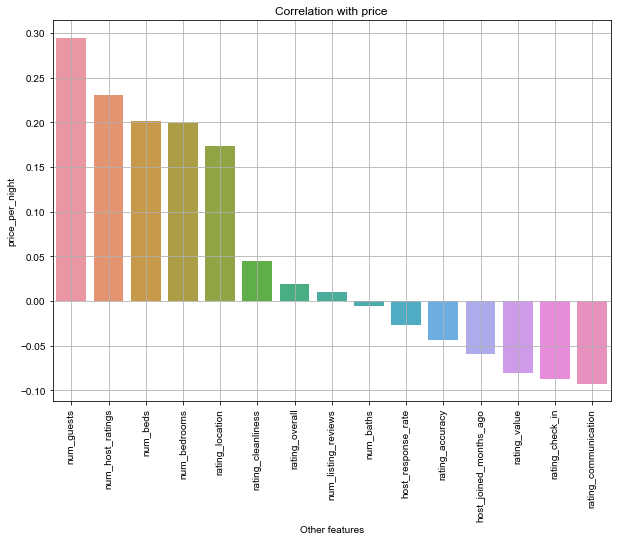

In [12]:
# Sorting the data and reset the index
df_corr = sub_df.corr().sort_values(numeric_features, ascending=False).reset_index()

df_corr = df_corr[df_corr["price_per_night"] < 1]  # Eliminate the 'price' in the x-axis

plt.figure(figsize=(10,7))
sns.barplot(x = "index", y = "price_per_night", data = df_corr);
plt.xlabel("Other features")
plt.xticks(rotation = 90)
plt.title("Correlation with price");
plt.grid(True)
sns.set_style("dark")

Notes:
- Positively correlated features to the right of location rating may not be good predictors of price.
- Some unexpected negative correlations (ratings, host response rate, how long host has been on airbnb). They don't seem intuitive.

### Explore numeric features that had high correlations with price.

#### Number of guests (highest correlation of 0.29)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10'),
  Text(9, 0, '12')])

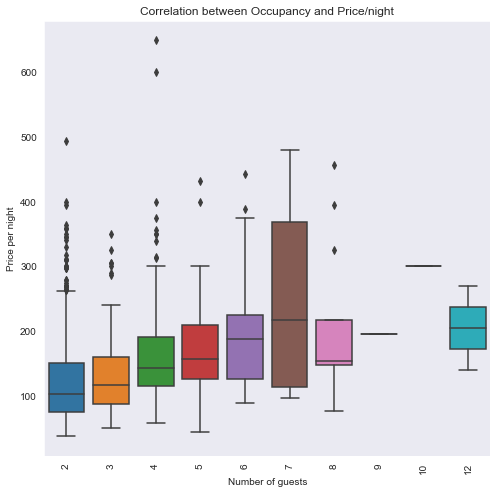

In [13]:
plt.figure(figsize=(8,8))
sns.boxplot(x='num_guests',y='price_per_night', data=sub_df)
plt.title('Correlation between Occupancy and Price/night')
plt.xlabel('Number of guests')
plt.ylabel('Price per night')
plt.xticks(rotation=90)

#### Number of guests (second highest correlation of 0.23)

Text(0, 0.5, 'Price')

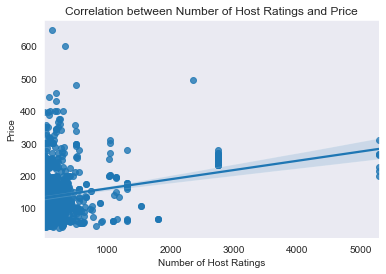

In [15]:
fig = sns.regplot(x='num_host_ratings',y='price_per_night',data=sub_df)
fig.set_title('Correlation between Number of Host Ratings and Price')
fig.set_xlabel('Number of Host Ratings')
fig.set_ylabel('Price')

- Number of host ratings may not be that great of a predictor since a lot of listings on the far left have high prices.
- Maybe hosts with 3000 and 5000 ratings are outliers.

#### Number of bedrooms (third highest correlation of 0.2)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

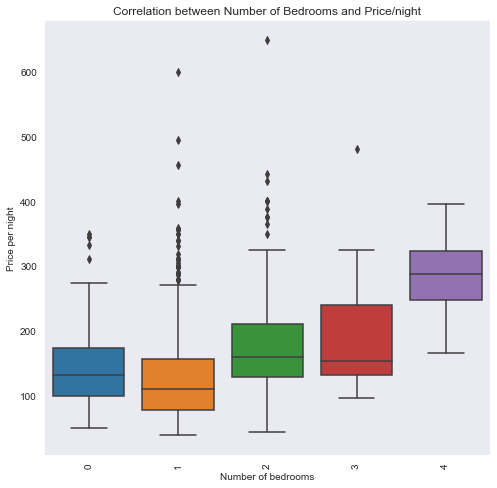

In [17]:
plt.figure(figsize=(8,8))
sns.boxplot(x='num_bedrooms',y='price_per_night', data=sub_df)
plt.title('Correlation between Number of Bedrooms and Price/night')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price per night')
plt.xticks(rotation=90)

## Categorical Features

In [18]:
df.columns

Index(['name', 'price_per_night', 'rating_overall', 'rating_cleanliness',
       'rating_accuracy', 'rating_communication', 'rating_location',
       'rating_check_in', 'rating_value', 'num_listing_reviews',
       'num_host_ratings', 'host_response_rate', 'host_joined_months_ago',
       'num_guests', 'num_bedrooms', 'num_beds', 'num_baths', 'superhost',
       'borough', 'property_type', 'wifi', 'air_conditioning', 'heating',
       'kitchen'],
      dtype='object')

Categorical features are 'superhost','borough','property_type','wifi', 'air_conditioning', 'heating','kitchen'

### Superhost

- Superhost listings are on average $6 more expensive. Not that substantial.

### Borough

In [20]:
df.groupby(['borough']).price_per_night.describe()

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
bronx,187.0,121.925134,62.855824,40.0,77.50,106.0,148.5,395.0
brooklyn,300.0,135.110000,77.473512,43.0,82.75,120.5,165.0,649.0
manhattan,211.0,197.317536,86.325511,54.0,126.00,184.0,254.0,494.0
queens,189.0,111.703704,58.437428,38.0,72.00,99.0,135.0,400.0
staten island,61.0,111.311475,48.837329,55.0,80.00,97.0,128.0,300.0


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'staten island'),
  Text(1, 0, 'queens'),
  Text(2, 0, 'bronx'),
  Text(3, 0, 'brooklyn'),
  Text(4, 0, 'manhattan')])

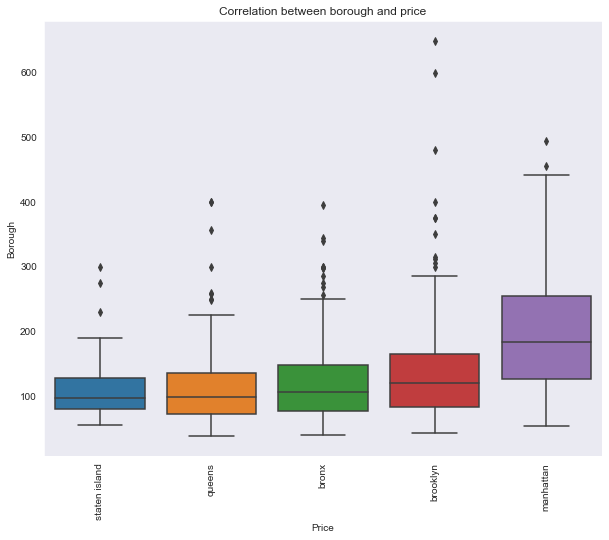

In [21]:
plt.figure(figsize=(10,8))
sns.boxplot(x='borough',y='price_per_night', data=df, order=['staten island','queens','bronx','brooklyn','manhattan'])
plt.title('Correlation between borough and price')
plt.ylabel('Borough')
plt.xlabel('Price')
plt.xticks(rotation=90)

### Property type

In [22]:
df.groupby(['property_type']).price_per_night.describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
apartment,352.0,162.843750,74.625874,55.0,112.75,145.0,189.00,456.0
condo,18.0,180.611111,91.497437,104.0,131.25,147.0,190.50,480.0
hotel,74.0,244.662162,60.550732,102.0,214.75,246.5,269.00,494.0
house,76.0,136.092105,52.789690,44.0,96.75,126.5,163.25,300.0
loft,11.0,254.545455,147.579378,99.0,159.00,215.0,297.00,600.0
private room,398.0,95.703518,49.554972,38.0,65.00,86.5,115.00,649.0
shared room,1.0,75.000000,NaN,75.0,75.00,75.0,75.00,75.0
townhouse,18.0,160.222222,81.940118,76.0,100.25,153.0,166.50,400.0


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'shared room'),
  Text(1, 0, 'private room'),
  Text(2, 0, 'house'),
  Text(3, 0, 'townhouse'),
  Text(4, 0, 'apartment'),
  Text(5, 0, 'condo'),
  Text(6, 0, 'hotel'),
  Text(7, 0, 'loft')])

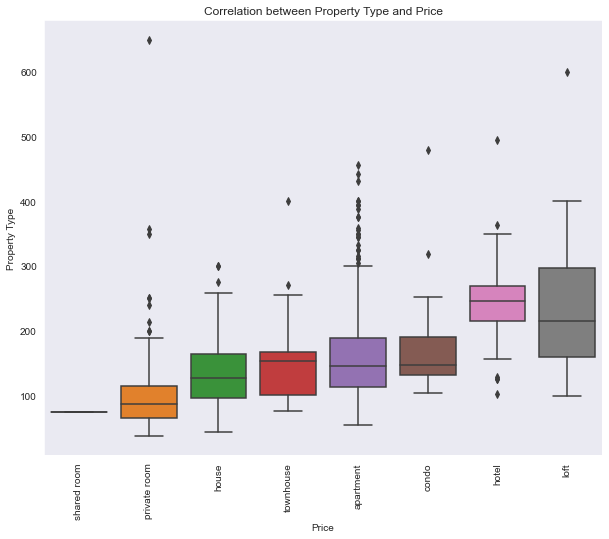

In [23]:
plt.figure(figsize=(10,8))
sns.boxplot(x='property_type',y='price_per_night', data=df, order=['shared room','private room','house','townhouse','apartment','condo','hotel','loft'])
plt.title('Correlation between Property Type and Price')
plt.ylabel('Property Type')
plt.xlabel('Price')
plt.xticks(rotation=90)

### Wifi

In [24]:
df.groupby(['wifi']).price_per_night.describe()

,count,mean,std,min,25%,50%,75%,max
wifi,,,,,,,,
0,5.0,90.200000,24.863628,50.0,86.0,99.0,100.0,116.0
1,943.0,140.422057,78.653140,38.0,85.0,120.0,172.5,649.0


- 99% listings have wifi, not useful

**Discard this feature**

In [25]:
df = df.drop(['wifi'],axis=1)

In [34]:
#confirm that wifi column dropped
df.columns

Index(['name', 'price_per_night', 'rating_overall', 'rating_cleanliness',
       'rating_accuracy', 'rating_communication', 'rating_location',
       'rating_check_in', 'rating_value', 'num_listing_reviews',
       'num_host_ratings', 'host_response_rate', 'host_joined_months_ago',
       'num_guests', 'num_bedrooms', 'num_beds', 'num_baths', 'superhost',
       'borough', 'property_type', 'kitchen'],
      dtype='object')

### Air conditioning

In [27]:
df.groupby(['air_conditioning']).price_per_night.describe()

,count,mean,std,min,25%,50%,75%,max
air_conditioning,,,,,,,,
0,40.0,92.725000,30.506819,44.0,72.0,90.0,98.0,173.0
1,908.0,142.246696,79.359861,38.0,88.0,120.5,175.0,649.0


- 96% listings have AC, not useful

**Discard this feature**

In [28]:
df = df.drop(['air_conditioning'],axis=1)

In [35]:
#confirm that air conditioning column dropped
df.columns

Index(['name', 'price_per_night', 'rating_overall', 'rating_cleanliness',
       'rating_accuracy', 'rating_communication', 'rating_location',
       'rating_check_in', 'rating_value', 'num_listing_reviews',
       'num_host_ratings', 'host_response_rate', 'host_joined_months_ago',
       'num_guests', 'num_bedrooms', 'num_beds', 'num_baths', 'superhost',
       'borough', 'property_type', 'kitchen'],
      dtype='object')

### Heating

In [30]:
df.groupby(['heating']).price_per_night.describe()

,count,mean,std,min,25%,50%,75%,max
heating,,,,,,,,
0,18.0,120.777778,85.413565,38.0,55.00,90.5,168.75,309.0
1,930.0,140.532258,78.410017,40.0,87.25,120.0,171.00,649.0


- 98% listings have heating, not useful

**Discard this feature**

In [32]:
df = df.drop(['heating'],axis=1)

In [36]:
#confirm that heating column dropped
df.columns

Index(['name', 'price_per_night', 'rating_overall', 'rating_cleanliness',
       'rating_accuracy', 'rating_communication', 'rating_location',
       'rating_check_in', 'rating_value', 'num_listing_reviews',
       'num_host_ratings', 'host_response_rate', 'host_joined_months_ago',
       'num_guests', 'num_bedrooms', 'num_beds', 'num_baths', 'superhost',
       'borough', 'property_type', 'kitchen'],
      dtype='object')

### Kitchen

In [37]:
df.groupby(['kitchen']).price_per_night.describe()

,count,mean,std,min,25%,50%,75%,max
kitchen,,,,,,,,
0,203.0,152.522167,85.753926,44.0,81.5,125.0,230.0,494.0
1,745.0,136.787919,76.178717,38.0,88.0,120.0,164.0,649.0


- properties with kitchens on average are cheaper across the data set, but the max price for a property with kitchen is higher than the max of a property without. this feature is probably not the most important for predicting price. Since it is binary it also increases complexity so discard this feature. This feature is probably also captured by property type

In [38]:
df = df.drop(['kitchen'],axis=1)

In [39]:
#confirm that kitchen column dropped
df.columns

Index(['name', 'price_per_night', 'rating_overall', 'rating_cleanliness',
       'rating_accuracy', 'rating_communication', 'rating_location',
       'rating_check_in', 'rating_value', 'num_listing_reviews',
       'num_host_ratings', 'host_response_rate', 'host_joined_months_ago',
       'num_guests', 'num_bedrooms', 'num_beds', 'num_baths', 'superhost',
       'borough', 'property_type'],
      dtype='object')

## Target Feature (Price per night)

Text(0.5, 0, 'Price per Night')

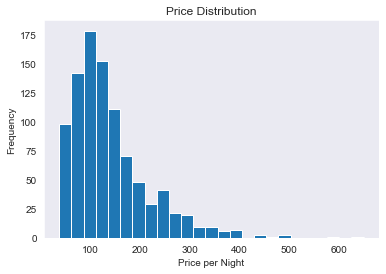

In [40]:
plt.hist(x=df['price_per_night'], bins=25)
plt.title('Price Distribution')
plt.ylabel('Frequency')
plt.xlabel('Price per Night')

- May want to perform log transformation for price for more normal distribution

In [43]:
#Add log price column to dataframe for convenience

df['log_price'] = np.log(df['price_per_night'])

In [44]:
#Confirm that log price column was added

df.columns

Index(['name', 'price_per_night', 'rating_overall', 'rating_cleanliness',
       'rating_accuracy', 'rating_communication', 'rating_location',
       'rating_check_in', 'rating_value', 'num_listing_reviews',
       'num_host_ratings', 'host_response_rate', 'host_joined_months_ago',
       'num_guests', 'num_bedrooms', 'num_beds', 'num_baths', 'superhost',
       'borough', 'property_type', 'log_price'],
      dtype='object')

Text(0.5, 0, 'Log Price per Night')

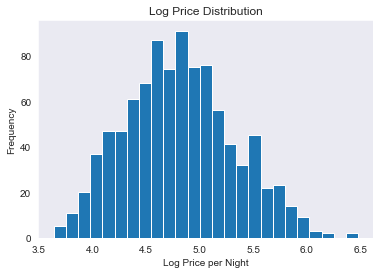

In [45]:
#Log transformation of target (price per night)

plt.hist(x=df['log_price'], bins=25)
plt.title('Log Price Distribution')
plt.ylabel('Frequency')
plt.xlabel('Log Price per Night')

- This is better. Since my goal is to create an accurate predictive pricing/recommendation tool (and interpretation is not as important), use log price in models also to see if this leads to better predictions.

### Now I have all viable numerical and categorical features (and target). Ready to move onto baseline models.

Baseline model

[1] put all numeric features into Sklearn Linear Reg, Lasso, Ridge

[2] put numeric features + categorical features (all total features) into Sklearn Linear Reg, Lasso, Ridge

[3] put numeric features + engineered features + categorical features (all total features + engineered) into Sklearn Linear Reg, Lasso, Ridge

- for all models and datasets, test on original target (price per night) and transformed target (log price per night)
- observe the cv scores and test scores for all outputs to determine how to move forward from baseline models

- Lasso should be able to narrow down features

In [48]:
#Create functions for each of the models

In [99]:
#Function for Sklearn Linear Regression

def linear_split_and_cross_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    #Split the data 60 - 20 - 20 train/val/test

    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=20)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=25)
        
    kf = KFold(n_splits=5, shuffle=True, random_state = 71)

    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data & report results
    print('\nTraining Cross-Val R^2 Scores:', cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='r2'))
    print('\nTraining Mean R^2 Score:',np.mean(cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='r2')))
    print('\nValidation Cross-Val R^2 Scores:',cross_val_score(lr_model, X_val, y_val, cv=kf, scoring='r2'))
    print('\nValidation Mean R^2 Score:',np.mean(cross_val_score(lr_model, X_val, y_val, cv=kf, scoring='r2')))

    # For final testing
    # print('\nTest Score:',lr_model.score(X_test, y_test))

In [100]:
#Function for LassoCV Regression

def lasso_cv_split_and_cross_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a lasso cv regression model, and report results
    '''
    
    
    #Split the data 60 - 20 - 20 train/val/test

    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=20)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=25)
    
    
    #CROSS VALIDATION RIDGE REGRESSION AND LASSO NEED STANDARD SCALER 
    std = StandardScaler()
    std.fit(X_train.values)

    X_scaled = std.transform(X_train.values)
    X_test_scaled = std.transform(X_test.values)
    
    
    # Run the cross validation, find the best alpha, refit the model on all the data with that alpha

    alphavec = 10**np.linspace(-2,2,200)

    lasso_model = LassoCV(alphas = alphavec, cv=5)
    lasso_model.fit(X_scaled, y_train)
    
    best_alpha = lasso_model.alpha_
    print('Best alpha:', best_alpha)
    
    
    #Lasso CV Regression
    kf = KFold(n_splits=5, shuffle=True, random_state = 71)

    
    #results from lasso reg cross val
    #all five values
    print('\nTraining Cross-Val R^2 Scores:',cross_val_score(lasso_model, X_scaled, y_train, cv=kf, scoring='r2'))
    #average of 5
    print('\nTraining Mean R^2 Score:',np.mean(cross_val_score(lasso_model, X_scaled, y_train, cv=kf, scoring='r2')))
    print('\nValidation Cross-Val R^2 Scores:',cross_val_score(lasso_model, X_val, y_val, cv=kf, scoring='r2'))
    #average of 5
    print('\nValidation Mean R^2 Score:',np.mean(cross_val_score(lasso_model, X_val, y_val, cv=kf, scoring='r2')))
    
    # For final testing
    # print('\nTest Score:',lasso_model.score(X_test_scaled, y_test))

In [101]:
#Function for RidgeCV Regression

def ridge_cv_split_and_cross_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a ridge cv regression model, and report results
    '''
    
    
    #Split the data 60 - 20 - 20 train/val/test

    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=20)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=25)
    
    
    #CROSS VALIDATION RIDGE REGRESSION AND LASSO NEED STANDARD SCALER 
    std = StandardScaler()
    std.fit(X_train.values)

    X_scaled = std.transform(X_train.values)
    X_test_scaled = std.transform(X_test.values)
    
    
    # Run the cross validation, find the best alpha, refit the model on all the data with that alpha

    alphavec = 10**np.linspace(-2,2,200)

    ridge_model = RidgeCV(alphas = alphavec, cv=5)
    ridge_model.fit(X_scaled, y_train)
    
    best_alpha = ridge_model.alpha_
    print('Best alpha:', best_alpha)
    
    
    #Ridge CV Regression
    kf = KFold(n_splits=5, shuffle=True, random_state = 71)

    
    #results from ridge reg cross val
    #all five values
    print('\nTraining Cross-Val R^2 Scores:',cross_val_score(ridge_model, X_scaled, y_train, cv=kf, scoring='r2'))
    #average of 5
    print('\nTraining Mean R^2 Score:',np.mean(cross_val_score(ridge_model, X_scaled, y_train, cv=kf, scoring='r2')))
    print('\nValidation Cross-Val R^2 Scores:',cross_val_score(ridge_model, X_val, y_val, cv=kf, scoring='r2'))
    #average of 5
    print('\nValidation Mean R^2 Score:',np.mean(cross_val_score(ridge_model, X_val, y_val, cv=kf, scoring='r2')))
    
    # For final testing
    # print('\nTest Score:',ridge_model.score(X_test_scaled, y_test))

### Baseline: Simple linear regression model on numeric features

In [51]:
df.columns

Index(['name', 'price_per_night', 'rating_overall', 'rating_cleanliness',
       'rating_accuracy', 'rating_communication', 'rating_location',
       'rating_check_in', 'rating_value', 'num_listing_reviews',
       'num_host_ratings', 'host_response_rate', 'host_joined_months_ago',
       'num_guests', 'num_bedrooms', 'num_beds', 'num_baths', 'superhost',
       'borough', 'property_type', 'log_price'],
      dtype='object')

In [53]:
# Numeric Features (X1)
X1 = df.loc[:,['rating_overall', 'rating_cleanliness',
       'rating_accuracy', 'rating_communication', 'rating_location',
       'rating_check_in', 'rating_value', 'num_listing_reviews',
       'num_host_ratings', 'host_response_rate', 'host_joined_months_ago',
       'num_guests', 'num_bedrooms', 'num_beds', 'num_baths']]

In [54]:
y = df.loc[:,['price_per_night']]
y_log = df.loc[:,['log_price']]

In [ ]:
y.shape
y_new.shape

# have to adjust shape so that y is only one row
y_new = np.ravel(y)

In [102]:
linear_split_and_cross_validate(X1, y_new)


Training Cross-Val R^2 Scores: [0.33538367 0.2166205  0.18355468 0.22992424 0.15880421]

Training Mean R^2 Score: 0.22485745902240978

Validation Cross-Val R^2 Scores: [0.15329443 0.26968327 0.15216974 0.27203105 0.60223343]

Validation Mean R^2 Score: 0.28988238524582044


- appear to be underfitting --> add more complexity

### Add more complexity. Add categorical feature, property type.

In [105]:
# Numeric features and property type (X2)
X2 = df.loc[:,['rating_overall', 'rating_cleanliness',
       'rating_accuracy', 'rating_communication', 'rating_location',
       'rating_check_in', 'rating_value', 'num_listing_reviews',
       'num_host_ratings', 'host_response_rate', 'host_joined_months_ago',
       'num_guests', 'num_bedrooms', 'num_beds', 'num_baths','property_type']]